In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import math 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore", message="Optimization failed to converge")

In [3]:
file_path = "project_1.csv"
df = pd.read_csv(file_path)

In [4]:
df

,Crop Name,Nitrogen (N),Phosphorus (P),Potassium (K),Temperature (°C),Humidity (%),pH,Soil Type,Required Water (mm per acre)
0,Cotton,66,22,87,37.851010,62.632322,8.2,Silty,810
1,Cotton,246,33,55,31.433397,95.878831,6.6,Peaty,1200
2,Rice,148,99,58,28.774617,67.132291,4.2,Chalky,635
3,Rice,244,98,149,37.540500,49.977494,6.2,Peaty,584
4,Rice,75,60,28,30.651686,43.316113,7.0,Silty,1040
...,...,...,...,...,...,...,...,...,...
2195,Rice,217,20,139,17.116412,71.776516,5.7,Peaty,819
2196,Millets,196,51,137,26.147130,69.010375,7.3,Clay,589
2197,Cotton,189,85,48,28.846909,29.264702,5.6,Loamy,644
2198,Pulses,206,72,40,10.107177,88.776341,7.4,Chalky,856


In [9]:
df['Temperature (°C)'] = df['Temperature (°C)'].apply(math.ceil)
df['Humidity (%)'] = df['Humidity (%)'].apply(math.ceil)
df

,Crop Name,Nitrogen (N),Phosphorus (P),Potassium (K),Temperature (°C),Humidity (%),pH,Soil Type,Required Water (mm per acre)
0,Cotton,66,22,87,38,63,8.2,Silty,810
1,Cotton,246,33,55,32,96,6.6,Peaty,1200
2,Rice,148,99,58,29,68,4.2,Chalky,635
3,Rice,244,98,149,38,50,6.2,Peaty,584
4,Rice,75,60,28,31,44,7.0,Silty,1040
...,...,...,...,...,...,...,...,...,...
2195,Rice,217,20,139,18,72,5.7,Peaty,819
2196,Millets,196,51,137,27,70,7.3,Clay,589
2197,Cotton,189,85,48,29,30,5.6,Loamy,644
2198,Pulses,206,72,40,11,89,7.4,Chalky,856


In [16]:
//to use linear regression
X = df[["Nitrogen (N)", "Phosphorus (P)", "Potassium (K)", "Temperature (°C)", "Humidity (%)", "pH"]]
y = df["Required Water (mm per acre)"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

model_info = {
    "Coefficients": model.coef_,
    "Intercept": model.intercept_,
    "Mean Squared Error": mse,
    "R-squared": r2,
}

model_info

{'Coefficients': array([ 1.00286368e-02, -1.44624429e-01,  5.30094599e-03,  1.05642757e-01,
        -1.86141320e-01, -7.04880072e+00]),
 'Intercept': 957.0577601573714,
 'Mean Squared Error': 119105.8327024763,
 'R-squared': -0.004915741926404982}

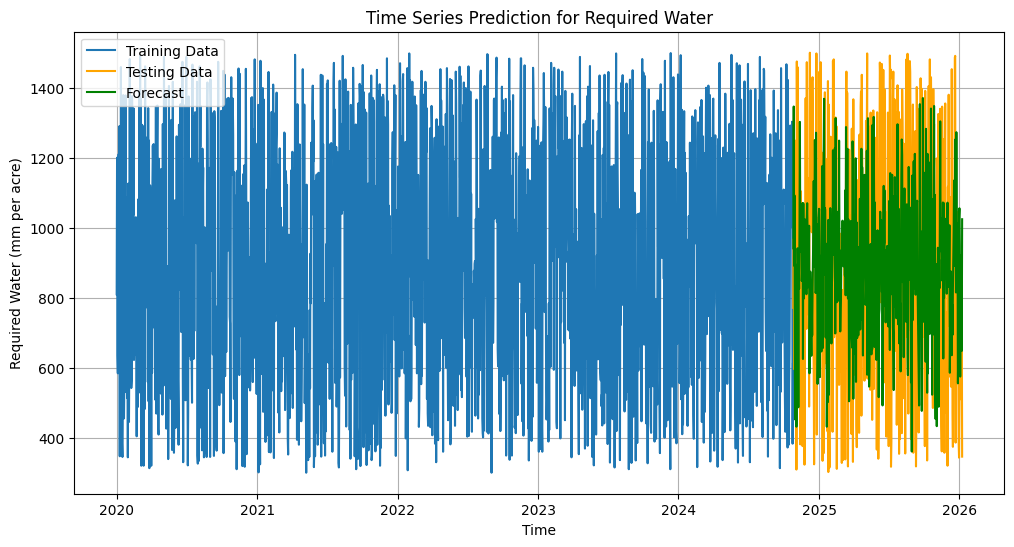

{'Mean Squared Error': 156681.16256386103,
 'Forecast': 2024-10-26     941.226095
 2024-10-27    1346.288576
 2024-10-28     891.683720
 2024-10-29    1092.309856
 2024-10-30     579.586529
                  ...     
 2026-01-04     920.977811
 2026-01-05     792.328575
 2026-01-06     832.559571
 2026-01-07     647.929927
 2026-01-08    1024.206965
 Freq: D, Length: 440, dtype: float64}

In [26]:
#to use time series andlysis
df["Time"] = pd.date_range(start="2020-01-01", periods=len(df), freq="D")

# Sorting the dataset by time
df.sort_values(by="Time", inplace=True)

# Selecting the time series target
time_series = df[["Time", "Required Water (mm per acre)"]].set_index("Time")

# Splitting the data into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(time_series))
train_data = time_series[:train_size]
test_data = time_series[train_size:]

# Applying Exponential Smoothing for time series forecasting
model_ts = ExponentialSmoothing(train_data, seasonal="add", seasonal_periods=365, trend="add", freq="D")
model_ts_fitted = model_ts.fit()

# Making predictions on the test set
forecast = model_ts_fitted.forecast(steps=len(test_data))

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Training Data")
plt.plot(test_data, label="Testing Data", color="orange")
plt.plot(forecast, label="Forecast", color="green")
plt.legend()
plt.title("Time Series Prediction for Required Water")
plt.xlabel("Time")
plt.ylabel("Required Water (mm per acre)")
plt.grid()
plt.show()

# Calculating evaluation metrics
mse_ts = mean_squared_error(test_data, forecast)
model_ts_summary = {
    "Mean Squared Error": mse_ts,
    "Forecast": forecast,
}

model_ts_summary

In [30]:
# Generating forecast for the next 30 days
forecast_steps = 30
forecast = fitted_arima.forecast(steps=forecast_steps)

# Generating a date range for the forecast period
forecast_dates = pd.date_range(start=df['Time'].iloc[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq="D")

# Prepare the forecast output with dates and forecasted values
forecast_output = pd.DataFrame({
    "Date": forecast_dates,
    "Forecasted Required Water (mm per acre)": forecast
})

# Display the forecast output
print(forecast_output)


                 Date  Forecasted Required Water (mm per acre)
2026-01-09 2026-01-09                               895.893556
2026-01-10 2026-01-10                               899.669838
2026-01-11 2026-01-11                               898.601934
2026-01-12 2026-01-12                               899.682073
2026-01-13 2026-01-13                               898.603001
2026-01-14 2026-01-14                               899.681073
2026-01-15 2026-01-15                               898.604001
2026-01-16 2026-01-16                               899.680074
2026-01-17 2026-01-17                               898.604999
2026-01-18 2026-01-18                               899.679076
2026-01-19 2026-01-19                               898.605996
2026-01-20 2026-01-20                               899.678081
2026-01-21 2026-01-21                               898.606990
2026-01-22 2026-01-22                               899.677087
2026-01-23 2026-01-23                               898

In [13]:
df.describe()

,Nitrogen (N),Phosphorus (P),Potassium (K),Temperature (°C),Humidity (%),pH,Required Water (mm per acre)
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,172.895455,60.125909,85.829091,25.323182,59.967273,6.506182,899.186818
std,73.416954,23.183670,38.026293,8.665562,23.451881,1.442135,342.180381
min,50.000000,20.000000,20.000000,11.000000,21.000000,4.000000,300.000000
25%,108.750000,40.000000,53.000000,18.000000,39.000000,5.300000,601.000000
50%,174.000000,60.000000,85.000000,25.000000,60.000000,6.500000,894.000000
75%,236.000000,80.000000,118.000000,33.000000,81.000000,7.800000,1201.500000
max,300.000000,100.000000,150.000000,40.000000,100.000000,9.000000,1500.000000


In [14]:
df.to_csv("project_new.csv", index=False)

In [19]:
df = df.drop_duplicates()


In [20]:
df = df.drop_duplicates(subset=['Nitrogen (N)','Phosphorus (P)','Potassium (K)','Temperature (°C)','Humidity (%)','pH','Required Water (mm per acre)'])

In [21]:
df

,Crop Name,Nitrogen (N),Phosphorus (P),Potassium (K),Temperature (°C),Humidity (%),pH,Soil Type,Required Water (mm per acre)
0,Cotton,66,22,87,37.851010,62.632322,8.2,Silty,810
1,Cotton,246,33,55,31.433397,95.878831,6.6,Peaty,1200
2,Rice,148,99,58,28.774617,67.132291,4.2,Chalky,635
3,Rice,244,98,149,37.540500,49.977494,6.2,Peaty,584
4,Rice,75,60,28,30.651686,43.316113,7.0,Silty,1040
...,...,...,...,...,...,...,...,...,...
2195,Rice,217,20,139,17.116412,71.776516,5.7,Peaty,819
2196,Millets,196,51,137,26.147130,69.010375,7.3,Clay,589
2197,Cotton,189,85,48,28.846909,29.264702,5.6,Loamy,644
2198,Pulses,206,72,40,10.107177,88.776341,7.4,Chalky,856


In [1]:
# Filter out rows where Production is 0
filtered_df = df[df['Production'] != 0]

# Group the filtered data and aggregate Area and Production
aggregated_data = filtered_df.groupby(
    ['Season', 'Crop'], 
    observed=False
).agg({'Area': 'sum', 'Production': 'sum'}).reset_index()

# Filter for Kharif and Arecanut with specific values
result = aggregated_data[
    (aggregated_data['Season'] == 'Kharif') & 
    (aggregated_data['Crop'] == 'Arecanut') & 
    (aggregated_data['Area'] == 1254.0) & 
    (aggregated_data['Production'] == 2000.0)
]

# Display the result
print(result)

NameError: name 'df' is not defined